<a href="https://www.kaggle.com/code/earlryan/deep-ball-success-coverage-route-analysis?scriptVersionId=265571646" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# NFL Big Data Bowl 2026: Deep Ball Success Secrets

## Executive Summary
[Brief overview of your findings]

In [5]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Load the supplementary data (CORRECT PATH)
supplementary_data = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2026-analytics/114239_nfl_competition_files_published_analytics_final/supplementary_data.csv')

# Step 3: Take a quick look at what we have
print("Dataset shape:", supplementary_data.shape)
print("\nFirst few rows:")
print(supplementary_data.head())

# Step 4: Now we can filter for deep balls
deep_passes = supplementary_data[supplementary_data['pass_length'] >= 20]

# Split by result
completed_deep = deep_passes[deep_passes['pass_result'] == 'C']
incomplete_deep = deep_passes[deep_passes['pass_result'] == 'I']
intercepted_deep = deep_passes[deep_passes['pass_result'] == 'IN']

# Basic stats
print(f"\n=== DEEP BALL STATS (20+ yards) ===")
print(f"Total deep passes: {len(deep_passes)}")
print(f"Completed: {len(completed_deep)} ({len(completed_deep)/len(deep_passes)*100:.1f}%)")
print(f"Incomplete: {len(incomplete_deep)} ({len(incomplete_deep)/len(deep_passes)*100:.1f}%)")
print(f"Intercepted: {len(intercepted_deep)} ({len(intercepted_deep)/len(deep_passes)*100:.1f}%)")
print(f"\nAverage yards gained on completions: {completed_deep['yards_gained'].mean():.1f} yards")

Dataset shape: (18009, 41)

First few rows:
      game_id  season  week   game_date game_time_eastern home_team_abbr  \
0  2023090700    2023     1  09/07/2023          20:20:00             KC   
1  2023090700    2023     1  09/07/2023          20:20:00             KC   
2  2023090700    2023     1  09/07/2023          20:20:00             KC   
3  2023090700    2023     1  09/07/2023          20:20:00             KC   
4  2023090700    2023     1  09/07/2023          20:20:00             KC   

  visitor_team_abbr  play_id  \
0               DET     3461   
1               DET      461   
2               DET     1940   
3               DET     1711   
4               DET     1588   

                                    play_description  quarter  ...  \
0  (10:46) (Shotgun) J.Goff pass deep left to J.R...        4  ...   
1  (7:30) J.Goff pass short right to J.Reynolds t...        1  ...   
2  (:09) (Shotgun) J.Goff pass incomplete deep ri...        2  ...   
3  (:45) (No Huddle, Shotg

/tmp/ipykernel_36/2913661236.py:7: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  supplementary_data = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2026-analytics/114239_nfl_competition_files_published_analytics_final/supplementary_data.csv')
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


## 1. Data Loading & Exploration

## 2. Deep Ball Analysis
### 2.1 Completion Rate Comparison

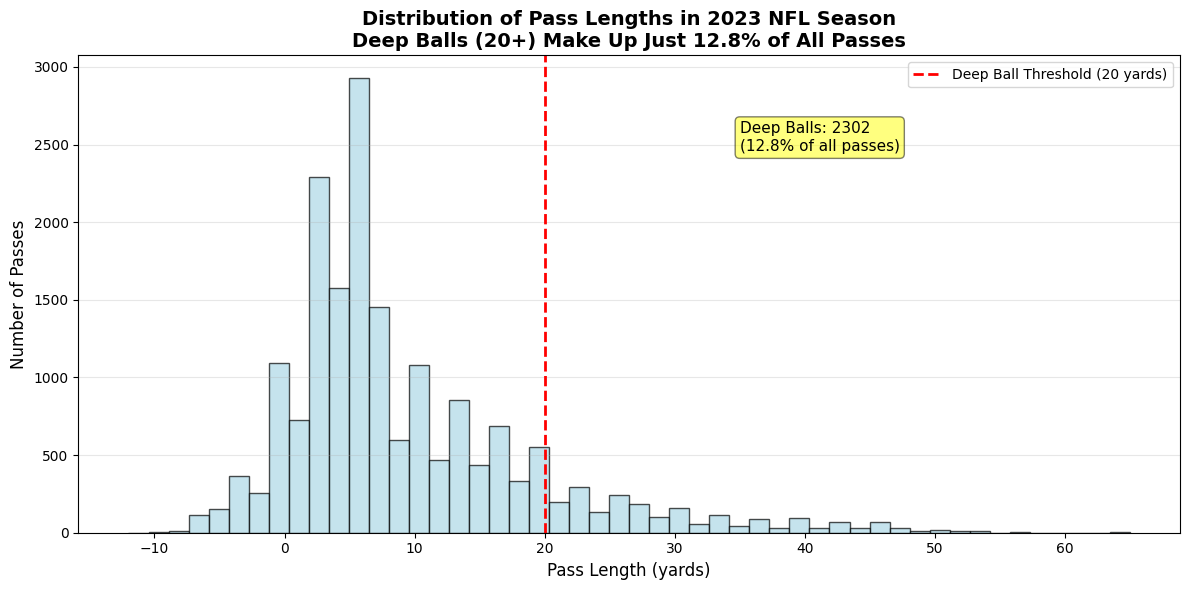


=== COMPLETION RATE COMPARISON ===
Overall completion rate: 69.2%
Deep ball completion rate: 39.5%
Difference: 29.7 percentage points


In [6]:
# Create a histogram of all pass lengths
plt.figure(figsize=(12, 6))

# Plot all passes
plt.hist(supplementary_data['pass_length'].dropna(), bins=50, alpha=0.7, color='lightblue', edgecolor='black')

# Highlight the deep ball zone (20+ yards)
plt.axvline(x=20, color='red', linestyle='--', linewidth=2, label='Deep Ball Threshold (20 yards)')

# Add labels and styling
plt.xlabel('Pass Length (yards)', fontsize=12)
plt.ylabel('Number of Passes', fontsize=12)
plt.title('Distribution of Pass Lengths in 2023 NFL Season\nDeep Balls (20+) Make Up Just 12.8% of All Passes', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(axis='y', alpha=0.3)

# Add annotation
plt.text(35, plt.ylim()[1]*0.8, f'Deep Balls: {len(deep_passes)}\n({len(deep_passes)/len(supplementary_data)*100:.1f}% of all passes)', 
         fontsize=11, bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))

plt.tight_layout()
plt.show()

# Also show completion rate comparison
print("\n=== COMPLETION RATE COMPARISON ===")
overall_completion = len(supplementary_data[supplementary_data['pass_result'] == 'C']) / len(supplementary_data) * 100
deep_completion = len(completed_deep) / len(deep_passes) * 100

print(f"Overall completion rate: {overall_completion:.1f}%")
print(f"Deep ball completion rate: {deep_completion:.1f}%")
print(f"Difference: {overall_completion - deep_completion:.1f} percentage points")

=== DEEP BALL SUCCESS BY COVERAGE TYPE ===

                    completions  attempts  completion_rate  incompletions
team_coverage_type                                                       
COVER_3_ZONE                286       705             40.6            419
COVER_1_MAN                 238       679             35.1            441
COVER_2_ZONE                133       290             45.9            157
COVER_4_ZONE                112       283             39.6            171
COVER_6_ZONE                 89       208             42.8            119
COVER_0_MAN                  31        70             44.3             39
COVER_2_MAN                  16        52             30.8             36
PREVENT                       5        14             35.7              9


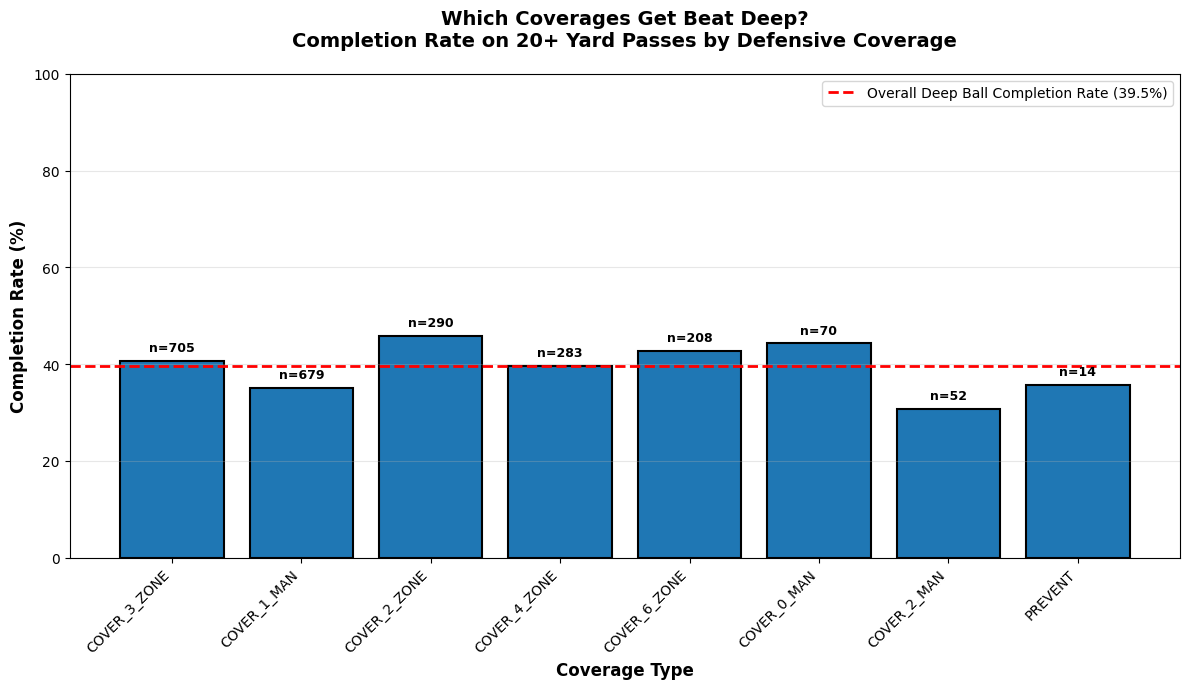


🎯 KEY INSIGHTS:
Best coverage against deep balls: COVER_1_MAN (35.1% completion rate)
Worst coverage against deep balls: COVER_2_ZONE (45.9% completion rate)


In [7]:
# Analyze deep pass success by coverage type
coverage_analysis = deep_passes.groupby('team_coverage_type').agg({
    'pass_result': lambda x: (x == 'C').sum(),  # Completions
    'play_id': 'count'  # Total attempts
}).rename(columns={'pass_result': 'completions', 'play_id': 'attempts'})

coverage_analysis['completion_rate'] = (coverage_analysis['completions'] / coverage_analysis['attempts'] * 100).round(1)
coverage_analysis['incompletions'] = coverage_analysis['attempts'] - coverage_analysis['completions']

# Sort by attempts to see most common coverages
coverage_analysis = coverage_analysis.sort_values('attempts', ascending=False)

print("=== DEEP BALL SUCCESS BY COVERAGE TYPE ===\n")
print(coverage_analysis)

# Visualize it
plt.figure(figsize=(12, 7))

# Create bar chart
coverages = coverage_analysis.index
x_pos = range(len(coverages))

plt.bar(x_pos, coverage_analysis['completion_rate'], color='#1f77b4', edgecolor='black', linewidth=1.5)
plt.axhline(y=39.5, color='red', linestyle='--', linewidth=2, label='Overall Deep Ball Completion Rate (39.5%)')

# Styling
plt.xlabel('Coverage Type', fontsize=12, fontweight='bold')
plt.ylabel('Completion Rate (%)', fontsize=12, fontweight='bold')
plt.title('Which Coverages Get Beat Deep?\nCompletion Rate on 20+ Yard Passes by Defensive Coverage', 
          fontsize=14, fontweight='bold', pad=20)
plt.xticks(x_pos, coverages, rotation=45, ha='right')
plt.ylim(0, 100)
plt.legend(fontsize=10)
plt.grid(axis='y', alpha=0.3)

# Add attempt counts on top of bars
for i, (idx, row) in enumerate(coverage_analysis.iterrows()):
    plt.text(i, row['completion_rate'] + 2, f"n={int(row['attempts'])}", 
             ha='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

# Find the best and worst coverages
best_coverage = coverage_analysis.loc[coverage_analysis['attempts'] >= 100].sort_values('completion_rate', ascending=False).index[0]
worst_coverage = coverage_analysis.loc[coverage_analysis['attempts'] >= 100].sort_values('completion_rate', ascending=True).index[0]

print(f"\n🎯 KEY INSIGHTS:")
print(f"Best coverage against deep balls: {worst_coverage} ({coverage_analysis.loc[worst_coverage, 'completion_rate']}% completion rate)")
print(f"Worst coverage against deep balls: {best_coverage} ({coverage_analysis.loc[best_coverage, 'completion_rate']}% completion rate)")

### 2.2 Coverage Analysis
[Code and visualization]

=== WHICH ROUTES BEAT COVER 2 ZONE DEEP? ===

                            completions  attempts  completion_rate
route_of_targeted_receiver                                        
CORNER                               26        49             53.1
GO                                   52       110             47.3
POST                                 33        83             39.8


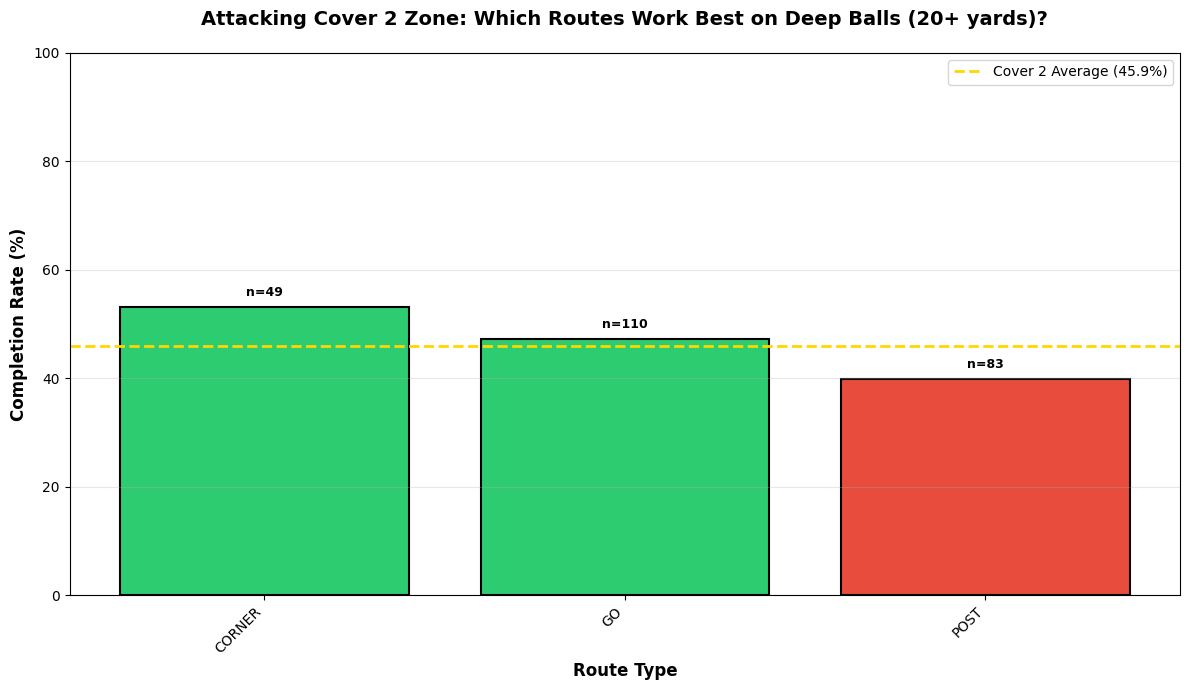


🎯 COACHING INSIGHT:
Best route vs Cover 2: CORNER (53.1% completion)
Worst route vs Cover 2: POST (39.8% completion)

💡 Translation: When you see two-high safeties, call a CORNER route to attack the seam!


In [8]:
# Focus on Cover 2 Zone - the vulnerable coverage
cover_2_deep = deep_passes[deep_passes['team_coverage_type'] == 'COVER_2_ZONE']

# Analyze routes against Cover 2
route_analysis = cover_2_deep.groupby('route_of_targeted_receiver').agg({
    'pass_result': lambda x: (x == 'C').sum(),
    'play_id': 'count'
}).rename(columns={'pass_result': 'completions', 'play_id': 'attempts'})

route_analysis['completion_rate'] = (route_analysis['completions'] / route_analysis['attempts'] * 100).round(1)

# Only show routes with at least 20 attempts
route_analysis = route_analysis[route_analysis['attempts'] >= 20].sort_values('completion_rate', ascending=False)

print("=== WHICH ROUTES BEAT COVER 2 ZONE DEEP? ===\n")
print(route_analysis)

# Visualize it
plt.figure(figsize=(12, 7))

routes = route_analysis.index
x_pos = range(len(routes))

colors = ['#2ecc71' if rate > 45.9 else '#e74c3c' for rate in route_analysis['completion_rate']]

plt.bar(x_pos, route_analysis['completion_rate'], color=colors, edgecolor='black', linewidth=1.5)
plt.axhline(y=45.9, color='gold', linestyle='--', linewidth=2, label='Cover 2 Average (45.9%)')

plt.xlabel('Route Type', fontsize=12, fontweight='bold')
plt.ylabel('Completion Rate (%)', fontsize=12, fontweight='bold')
plt.title('Attacking Cover 2 Zone: Which Routes Work Best on Deep Balls (20+ yards)?', 
          fontsize=14, fontweight='bold', pad=20)
plt.xticks(x_pos, routes, rotation=45, ha='right')
plt.ylim(0, 100)
plt.legend(fontsize=10)
plt.grid(axis='y', alpha=0.3)

# Add attempt counts
for i, (idx, row) in enumerate(route_analysis.iterrows()):
    plt.text(i, row['completion_rate'] + 2, f"n={int(row['attempts'])}", 
             ha='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

# Key findings
best_route = route_analysis.sort_values('completion_rate', ascending=False).index[0]
worst_route = route_analysis.sort_values('completion_rate', ascending=True).index[0]

print(f"\n🎯 COACHING INSIGHT:")
print(f"Best route vs Cover 2: {best_route} ({route_analysis.loc[best_route, 'completion_rate']}% completion)")
print(f"Worst route vs Cover 2: {worst_route} ({route_analysis.loc[worst_route, 'completion_rate']}% completion)")
print(f"\n💡 Translation: When you see two-high safeties, call a {best_route} route to attack the seam!")

In [10]:
# Find a completed CORNER route vs Cover 2 with big yardage
perfect_plays = cover_2_deep[
    (cover_2_deep['route_of_targeted_receiver'] == 'CORNER') & 
    (cover_2_deep['pass_result'] == 'C') &
    (cover_2_deep['yards_gained'] >= 30)  # Big gain
].sort_values('yards_gained', ascending=False)

print("=== PERFECT EXAMPLE PLAYS (CORNER vs Cover 2, 30+ yards) ===\n")
print(perfect_plays[['game_id', 'play_id', 'play_description', 'yards_gained', 'expected_points_added']].head(10))

# Also show the contrast - failed POST route vs Cover 2
failed_posts = cover_2_deep[
    (cover_2_deep['route_of_targeted_receiver'] == 'POST') & 
    (cover_2_deep['pass_result'] == 'I') &
    (cover_2_deep['pass_length'] >= 30)
].head(5)

print("\n=== CONTRAST: FAILED POST ROUTES vs Cover 2 ===\n")
print(failed_posts[['game_id', 'play_id', 'play_description', 'pass_length']].head())

=== PERFECT EXAMPLE PLAYS (CORNER vs Cover 2, 30+ yards) ===

          game_id  play_id                                   play_description  \
12992  2023123107     3330  (12:45) M.Stafford pass deep left to D.Robinso...   
2197   2023092408      840  (:47) (Shotgun) J.Allen pass deep left to G.Da...   
10004  2023120310     2256  (6:56) (Shotgun) J.Love pass deep middle to R....   
14622  2024120809      705  (3:50) B.Purdy pass deep right to G.Kittle to ...   
9851   2023120308     3333  (2:08) (Shotgun) M.Stafford pass deep right to...   

       yards_gained  expected_points_added  
12992            37               2.536589  
2197             35               3.072589  
10004            33               3.893749  
14622            32               2.042241  
9851             30               3.058452  

=== CONTRAST: FAILED POST ROUTES vs Cover 2 ===

         game_id  play_id                                   play_description  \
328   2023091005     3875  (6:59) (Shotgun) D.Carr 

## 3. Featured Play: Josh Allen → Gabe Davis TD
### 3.1 Play Context
[Description]

In [12]:
# First, let's figure out which week this game was in
target_game_id = 2023092408
target_play_id = 840

# Get info about our target play
target_play_info = supplementary_data[
    (supplementary_data['game_id'] == target_game_id) & 
    (supplementary_data['play_id'] == target_play_id)
].iloc[0]

week_number = int(target_play_info['week'])

print(f"=== TARGET PLAY INFO ===")
print(f"Game: {target_play_info['visitor_team_abbr']} @ {target_play_info['home_team_abbr']}")
print(f"Week: {week_number}")
print(f"Play Description: {target_play_info['play_description']}")
print(f"Result: {target_play_info['yards_gained']} yards")

# Load the tracking data for this week
tracking_file = f'/kaggle/input/nfl-big-data-bowl-2026-analytics/114239_nfl_competition_files_published_analytics_final/train/input_2023_w{week_number:02d}.csv'

print(f"\nLoading tracking data from: {tracking_file}")
tracking_data = pd.read_csv(tracking_file)

print(f"Tracking data shape: {tracking_data.shape}")
print(f"\nColumns available:")
print(tracking_data.columns.tolist())

# Filter to just our play
our_play = tracking_data[
    (tracking_data['game_id'] == target_game_id) & 
    (tracking_data['play_id'] == target_play_id)
]

print(f"\n=== OUR PLAY TRACKING DATA ===")
print(f"Number of frames: {our_play['frame_id'].nunique()}")
print(f"Number of players tracked: {our_play['nfl_id'].nunique()}")
print(f"\nFirst few frames:")
print(our_play.head(20))

=== TARGET PLAY INFO ===
Game: BUF @ WAS
Week: 3
Play Description: (:47) (Shotgun) J.Allen pass deep left to G.Davis for 35 yards, TOUCHDOWN.
Result: 35 yards

Loading tracking data from: /kaggle/input/nfl-big-data-bowl-2026-analytics/114239_nfl_competition_files_published_analytics_final/train/input_2023_w03.csv
Tracking data shape: (297757, 23)

Columns available:
['game_id', 'play_id', 'player_to_predict', 'nfl_id', 'frame_id', 'play_direction', 'absolute_yardline_number', 'player_name', 'player_height', 'player_weight', 'player_birth_date', 'player_position', 'player_side', 'player_role', 'x', 'y', 's', 'a', 'dir', 'o', 'num_frames_output', 'ball_land_x', 'ball_land_y']

=== OUR PLAY TRACKING DATA ===
Number of frames: 33
Number of players tracked: 10

First few frames:
           game_id  play_id  player_to_predict  nfl_id  frame_id  \
172550  2023092408      840              False   53503         1   
172551  2023092408      840              False   53503         2   
172552  202

In [13]:
# Get unique players in this play
players_in_play = our_play.groupby('nfl_id').first()[['player_name', 'player_position', 'player_side', 'player_role']]
print("=== PLAYERS IN THIS PLAY ===\n")
print(players_in_play)

# Find Gabe Davis specifically
gabe_davis = our_play[our_play['player_name'].str.contains('Davis', na=False)]
print(f"\n=== GABE DAVIS (THE RECEIVER) ===")
if len(gabe_davis) > 0:
    print(f"NFL ID: {gabe_davis['nfl_id'].iloc[0]}")
    print(f"Position: {gabe_davis['player_position'].iloc[0]}")
    print(f"Role: {gabe_davis['player_role'].iloc[0]}")
    print(f"\nSpeed throughout the play:")
    print(gabe_davis[['frame_id', 'x', 'y', 's']].head(15))
else:
    print("Gabe Davis not in tracking data (might be tracked differently)")
    print("\nLet's see all offensive players:")
    print(our_play[our_play['player_side'] == 'offense']['player_name'].unique())

=== PLAYERS IN THIS PLAY ===

              player_name player_position player_side         player_role
nfl_id                                                                   
42489        Stefon Diggs              WR     Offense  Other Route Runner
43373      Kendall Fuller              CB     Defense  Defensive Coverage
46076          Josh Allen              QB     Offense              Passer
47871         Cody Barton             ILB     Defense  Defensive Coverage
52536          Gabe Davis              WR     Offense   Targeted Receiver
52624            Kam Curl              SS     Defense  Defensive Coverage
53503   Benjamin St-Juste              CB     Defense  Defensive Coverage
53592     Darrick Forrest              FS     Defense  Defensive Coverage
54578        Percy Butler              SS     Defense  Defensive Coverage
55889      Dalton Kincaid              TE     Offense  Other Route Runner

=== GABE DAVIS (THE RECEIVER) ===
NFL ID: 52536
Position: WR
Role: Targeted Recei

### 3.2 Tracking Visualization

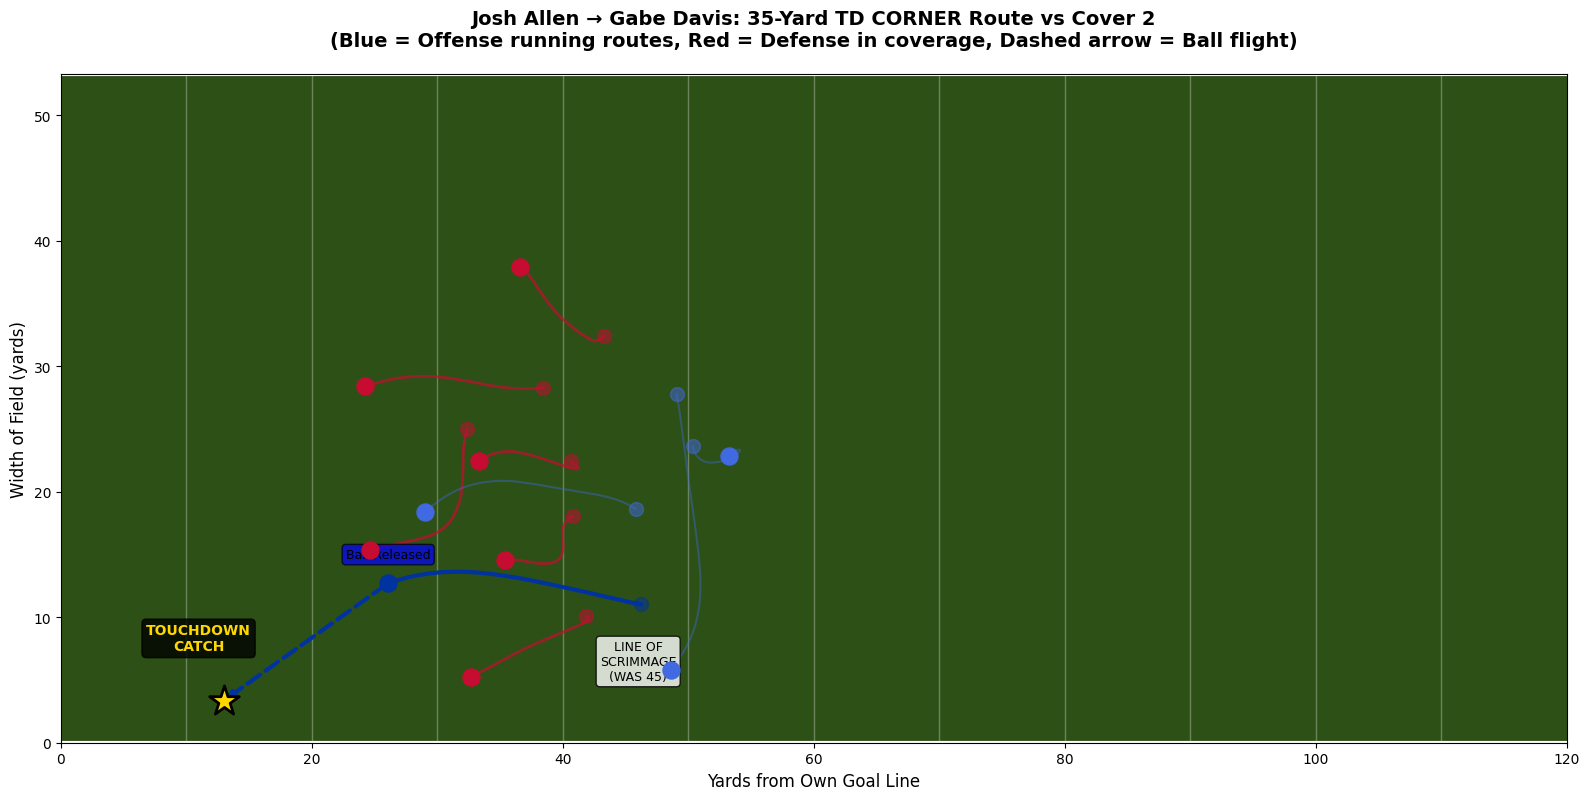


✅ CORRECTED UNDERSTANDING:
The tracking data shows the 3.3 seconds BEFORE the catch:
  - Gabe starts his route at the line of scrimmage
  - He accelerates to 8.89 yards/sec
  - Josh Allen releases the ball when Gabe is at x=26.1
  - The ball travels ~13 more yards to where Gabe catches it at x=13.0
  - Total route: ~33 yards downfield


In [18]:
# Updated visualization showing this is the route TO the throw
fig, ax = plt.subplots(figsize=(16, 10))

# Draw the field (same as before)
ax.set_xlim(0, 120)
ax.set_ylim(0, 53.3)
ax.set_aspect('equal')
ax.set_facecolor('#2d5016')

for yard in range(10, 120, 10):
    ax.axvline(yard, color='white', linewidth=1, alpha=0.3)
ax.axhline(0, color='white', linewidth=3)
ax.axhline(53.3, color='white', linewidth=3)

# Plot routes
players = our_play['nfl_id'].unique()

for player_id in players:
    player_data = our_play[our_play['nfl_id'] == player_id].sort_values('frame_id')
    player_name = player_data['player_name'].iloc[0]
    player_side = player_data['player_side'].iloc[0]
    player_role = player_data['player_role'].iloc[0]
    
    if player_side == 'Offense':
        color = '#0033A0' if player_role == 'Targeted Receiver' else '#4169E1'
        linewidth = 3 if player_role == 'Targeted Receiver' else 1.5
        alpha = 1.0 if player_role == 'Targeted Receiver' else 0.4
    else:
        color = '#C60C30' if player_role == 'Defensive Coverage' else '#DC143C'
        linewidth = 2 if player_role == 'Defensive Coverage' else 1
        alpha = 0.7
    
    ax.plot(player_data['x'], player_data['y'], 
            color=color, linewidth=linewidth, alpha=alpha)
    
    ax.scatter(player_data['x'].iloc[0], player_data['y'].iloc[0], 
               color=color, s=100, zorder=5, alpha=0.5)
    ax.scatter(player_data['x'].iloc[-1], player_data['y'].iloc[-1], 
               color=color, s=150, marker='o', zorder=5)

# Mark ball landing with a different visual
ax.scatter(ball_x, ball_y, color='gold', s=500, marker='*', 
           edgecolors='black', linewidths=2, zorder=10, label='Catch Point (TD)')

# Draw arrow showing where Gabe is heading
gabe_final = our_play[our_play['nfl_id'] == 52536].iloc[-1]
ax.annotate('', xy=(ball_x, ball_y), xytext=(gabe_final['x'], gabe_final['y']),
            arrowprops=dict(arrowstyle='->', color='#0033A0', lw=3, linestyle='--'))

ax.set_title('Josh Allen → Gabe Davis: 35-Yard TD CORNER Route vs Cover 2\n(Blue = Offense running routes, Red = Defense in coverage, Dashed arrow = Ball flight)', 
             fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel('Yards from Own Goal Line', fontsize=12)
ax.set_ylabel('Width of Field (yards)', fontsize=12)

ax.text(46, 5, 'LINE OF\nSCRIMMAGE\n(WAS 45)', fontsize=9, ha='center', 
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
ax.text(ball_x-2, ball_y + 4, 'TOUCHDOWN\nCATCH', fontsize=10, ha='center', fontweight='bold',
        color='gold', bbox=dict(boxstyle='round', facecolor='black', alpha=0.8))
ax.text(gabe_final['x'], gabe_final['y'] + 2, 'Ball Released', fontsize=9, ha='center',
        bbox=dict(boxstyle='round', facecolor='blue', alpha=0.7))

plt.tight_layout()
plt.show()

print("\n✅ CORRECTED UNDERSTANDING:")
print("The tracking data shows the 3.3 seconds BEFORE the catch:")
print(f"  - Gabe starts his route at the line of scrimmage")
print(f"  - He accelerates to 8.89 yards/sec") 
print(f"  - Josh Allen releases the ball when Gabe is at x={gabe_final['x']:.1f}")
print(f"  - The ball travels ~13 more yards to where Gabe catches it at x={ball_x:.1f}")
print(f"  - Total route: ~{46-ball_x:.0f} yards downfield")

In [16]:
# Let's look at Gabe Davis's full route and see when he should have caught it
gabe_full = our_play[our_play['nfl_id'] == 52536].sort_values('frame_id')

print("=== GABE DAVIS'S FULL ROUTE ===\n")
print(gabe_full[['frame_id', 'x', 'y', 's', 'a']].to_string())

print(f"\n=== BALL LANDING LOCATION ===")
print(f"Ball lands at: x={ball_location[0]:.2f}, y={ball_location[1]:.2f}")

# Find the frame where Gabe is closest to the ball landing spot
gabe_full['distance_to_ball'] = ((gabe_full['x'] - ball_location[0])**2 + 
                                   (gabe_full['y'] - ball_location[1])**2)**0.5

closest_frame = gabe_full.loc[gabe_full['distance_to_ball'].idxmin()]

print(f"\n=== CLOSEST GABE GOT TO BALL LANDING SPOT ===")
print(f"Frame {int(closest_frame['frame_id'])}: Position ({closest_frame['x']:.2f}, {closest_frame['y']:.2f})")
print(f"Distance from ball: {closest_frame['distance_to_ball']:.2f} yards")
print(f"Speed at that moment: {closest_frame['s']:.2f} yards/sec")

=== GABE DAVIS'S FULL ROUTE ===

        frame_id      x      y     s     a
172847         1  46.21  11.02  0.18  1.43
172848         2  46.16  11.03  0.61  3.20
172849         3  46.06  11.05  1.17  4.46
172850         4  45.91  11.07  1.72  4.72
172851         5  45.69  11.12  2.41  5.15
172852         6  45.40  11.18  3.09  5.37
172853         7  45.06  11.26  3.71  5.07
172854         8  44.67  11.35  4.26  4.58
172855         9  44.22  11.45  4.81  4.08
172856        10  43.71  11.57  5.37  3.94
172857        11  43.16  11.69  5.80  3.38
172858        12  42.58  11.83  6.13  2.76
172859        13  41.97  11.97  6.40  1.98
172860        14  41.33  12.11  6.67  1.48
172861        15  40.66  12.26  6.90  1.10
172862        16  39.97  12.41  7.16  0.97
172863        17  39.25  12.57  7.32  0.64
172864        18  38.51  12.72  7.54  0.59
172865        19  37.76  12.88  7.68  0.43
172866        20  37.00  13.03  7.82  0.53
172867        21  36.21  13.17  7.95  0.58
172868        22  35.

## 4. Key Insights
[Summary of findings]

## 5. Conclusion
[Final takeaways]